In [59]:
# !pip install kaggle

In [60]:
# from google.colab import files
# files.upload()

In [61]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [62]:
# !kaggle competitions download -c dogs-vs-cats

In [18]:
from zipfile import ZipFile
dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted!")

The dataset is extracted!


In [19]:
from zipfile import ZipFile
dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The train dataset is extracted!")

The train dataset is extracted!


In [19]:
import os

In [20]:
import os
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


In [54]:
file_names = os.listdir('train')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from PIL import Image
from google.colab.patches import cv2_imshow

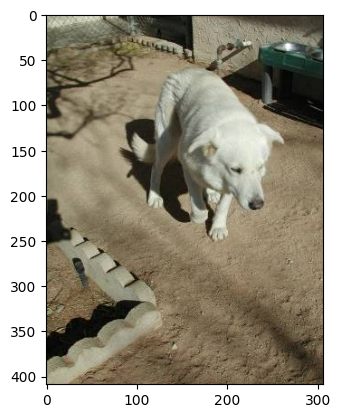

In [22]:
img_dog = mpimg.imread("train/dog.8626.jpg")
plt.imshow(img_dog)

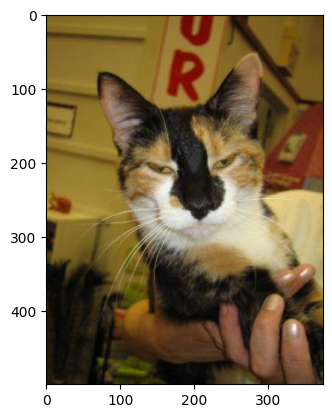

In [23]:
img_dog = mpimg.imread("train/cat.6177.jpg")
plt.imshow(img_dog)

In [24]:
file_names = os.listdir("train")
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count +=1

print("Dogs: ", dog_count)
print("Cats: ", cat_count)

Dogs:  12500
Cats:  12500


In [57]:
#os.mkdir("image resized")

In [58]:
# original_folder = "train/"
# resized_folder = "image resized/"

# for i in range(2000):
#   filename = os.listdir(original_folder)[i]
#   img_path = original_folder + filename

#   img = Image.open(img_path)
#   img = img.resize((224,224))
#   img = img.convert("RGB")

#   newImgPath = resized_folder + filename
#   img.save(newImgPath)

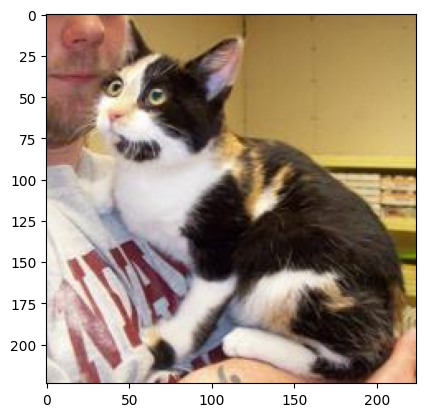

In [27]:
img = mpimg.imread("/content/image resized/cat.10251.jpg")
imgplt = plt.imshow(img)
plt.show()

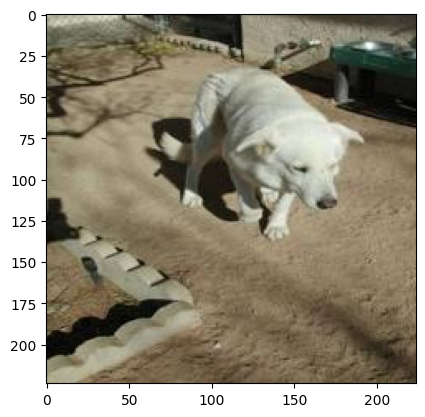

In [28]:
img = mpimg.imread("/content/image resized/dog.8626.jpg")
imgplt = plt.imshow(img)
plt.show()

In [29]:
filenames = os.listdir("image resized")
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [30]:
print(filenames[0:5])

['dog.8626.jpg', 'cat.8022.jpg', 'dog.7812.jpg', 'dog.5199.jpg', 'cat.6177.jpg']


In [31]:
print(labels[0:5])

[1, 0, 1, 1, 0]


In [32]:
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1004  996]


In [34]:
import cv2
import glob

img_dir = "/content/image resized/"
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(img_dir + "*." + e)) for e in image_extension]

dog_cat = np.asarray([cv2.imread(file) for file in files])

In [37]:
X = dog_cat
y = np.asarray(labels)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [39]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [2]:
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
num_classes = 2
# Use a more recent model URL
mobilenet_model = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5'

feature_extractor = hub.KerasLayer(mobilenet_model, trainable=False)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    feature_extractor,
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [6]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])

In [40]:
model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 56s 1s/step - loss: 0.2579 - accuracy: 0.8800
Epoch 2/5
50/50 [==============================] - 51s 1s/step - loss: 0.0667 - accuracy: 0.9806
Epoch 3/5
50/50 [==============================] - 51s 1s/step - loss: 0.0481 - accuracy: 0.9862
Epoch 4/5
50/50 [==============================] - 50s 993ms/step - loss: 0.0363 - accuracy: 0.9900
Epoch 5/5
50/50 [==============================] - 53s 1s/step - loss: 0.0296 - accuracy: 0.9950


In [55]:
score, acc = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {score:.2f}%")
print(f"Accuracy: {acc:.2f}%")

13/13 [==============================] - 14s 1s/step - loss: 0.0716 - accuracy: 0.9650
Loss: 0.07%
Accuracy: 0.96%


In [51]:
def dog_or_cat():
  input_image_path = input("Path of the image")
  input_image = cv2.imread(input_image_path)
  cv2_imshow(input_image)
  input_image_resize = cv2.resize(input_image, (224,224))
  input_image_scaled = input_image_resize/255
  image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
  input_prediction = model.predict(image_reshaped)
  input_pred_label = np.argmax(input_prediction)

  if input_pred_label == 0:
    print("It's a Cat")
  else:
    print("It's a Dog")

Path of the image/content/cat.jpg


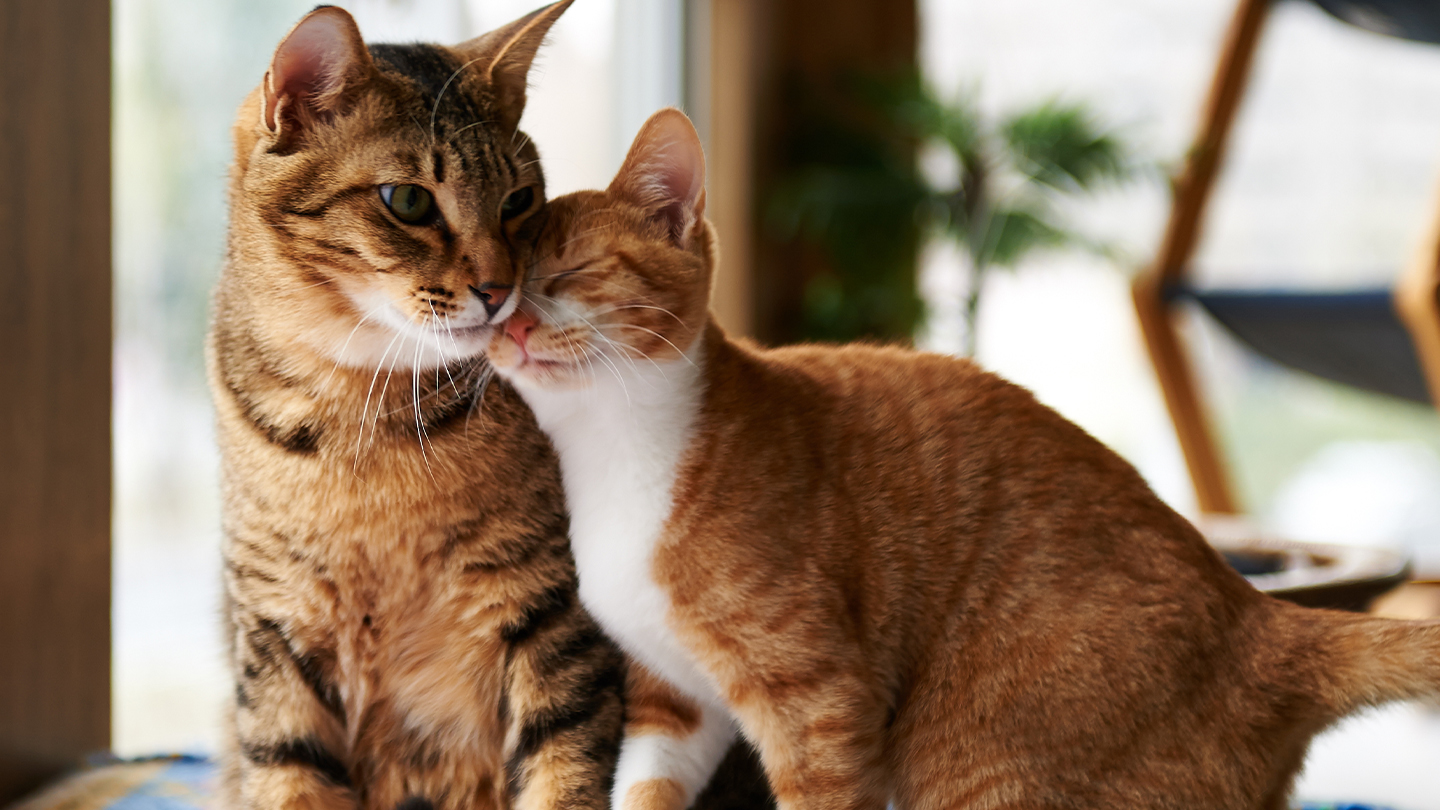

1/1 [==============================] - 0s 73ms/step
It's a Cat


In [52]:
dog_or_cat()

Path of the image/content/dog.jpg


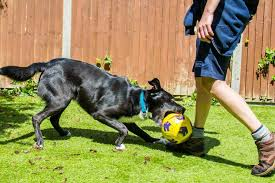

1/1 [==============================] - 0s 46ms/step
It's a Dog


In [53]:
dog_or_cat()